In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import clone_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import time


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, roc_auc_score

2024-04-21 12:41:20.033133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 12:41:20.033227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 12:41:20.149707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data  = np.load("/kaggle/input/de-lds-shuffled-seed/shuffled_data.npy")
labels_edited  = np.load("/kaggle/input/de-lds-shuffled-seed/shuffled_labels.npy")

In [3]:
max = np.max(data)
min = np.min(data)

#Normalizing data
data = data/max
data = (data - np.mean(data))/np.std(data)


#Splitting Dataset into train, validation, test 
train_labels = labels_edited[0:550]
test_labels = labels_edited[550:600]
final_labels = labels_edited[600:675]

train_data = data[0:550]
test_data = data[550:600]
final_test = data[600:675]



cf_labels = np.where(final_labels== -1, 2, final_labels) #Label in the form for confusion matrix
un, co = np.unique(cf_labels, return_counts=True)
print(f'Unique: {un}, Counts: {co}')

Unique: [0. 1. 2.], Counts: [25 25 25]


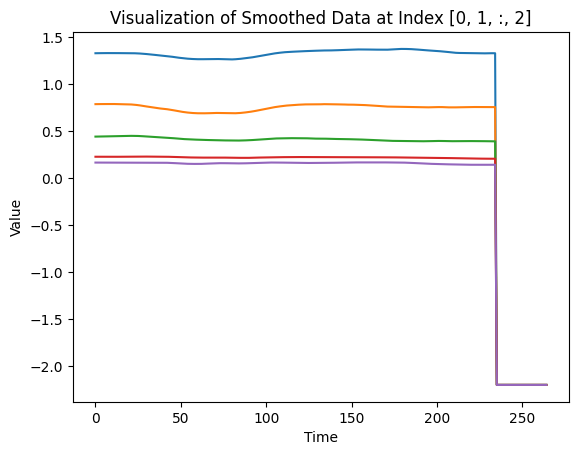

In [4]:
# Visualize the smoothed data
plt.plot(data[0, 2, :, :])
plt.title("Visualization of Smoothed Data at Index [0, 1, :, 2]")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

In [5]:
train_labels_reshaped = train_labels.reshape(-1,1) #Formatting for input to the CNN model
test_labels_reshaped = test_labels.reshape(-1,1)
final_labels_reshaped = final_labels.reshape(-1,1)

train_labels_reshaped = to_categorical(train_labels_reshaped, 3) #One Hot Encoding
test_labels_reshaped = to_categorical(test_labels_reshaped, 3)
final_labels_reshaped = to_categorical(final_labels_reshaped, 3)

In [6]:

train_data, train_labels_reshaped = shuffle(train_data, train_labels_reshaped, random_state=42)


In [7]:
'''
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras
import numpy as np
import time


model = Sequential([
    Conv2D(filters= 64, kernel_size= 5, input_shape = (62,265,5), padding= 'same'), 
    Conv2D(filters= 64, kernel_size= 3, padding= 'same'),
    Conv2D(filters= 64, kernel_size= 3, padding= 'same'),
    MaxPooling2D(pool_size= 2,strides = 2),
    #BatchNormalization(),
    Dropout(0.3),

    Conv2D(filters= 128, kernel_size= 3, padding= 'same'), 
    Conv2D(filters= 128, kernel_size= 3, padding= 'same'),
    MaxPooling2D(pool_size= 2, strides = 2),
    #BatchNormalization(),
    Dropout(0.35),
    
    Conv2D(filters= 256, kernel_size= 3, padding= 'same'), 
    #MaxPooling2D(pool_size= 2, strides = 2), # This wasn't here, all batch norm
    #BatchNormalization(),

    Reshape((66, 15*256), input_shape= (15, 66, 256)), #Important to reshape so data passed to LSTM Layer correctly
    
    LSTM(units= 64, activation= 'tanh', input_shape= [1325, 62], return_sequences = True),
    Dropout(0.25),
    LSTM(units= 128, activation= 'tanh', return_sequences = True),
    Dropout(0.3),
    LSTM(units= 128, activation= 'tanh', return_sequences = True),
    Dropout(0.35),
    LSTM(units= 256, activation= 'tanh', return_sequences = True),
    
    Flatten(),
    
    Dense(512, activation= 'relu'), 
    Dropout(0.25), 
    Dense(256, activation= 'relu'),
    Dropout(0.2),
    Dense(64, activation= 'relu'),
    Dense(3, activation= 'softmax')
  ])

  #Compile Hybrid Model 
model.compile(optimizer= keras.optimizers.Adam(learning_rate=1e-4), loss= keras.losses.categorical_crossentropy, metrics= ['accuracy', tf.keras.metrics.RootMeanSquaredError()])

model.summary()

'''


"\nimport matplotlib.pyplot as plt\nfrom sklearn.model_selection import StratifiedKFold\nfrom tensorflow.keras.models import Sequential, clone_model\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense\nfrom tensorflow.keras.callbacks import ReduceLROnPlateau\nimport keras\nimport numpy as np\nimport time\n\n\nmodel = Sequential([\n    Conv2D(filters= 64, kernel_size= 5, input_shape = (62,265,5), padding= 'same'), \n    Conv2D(filters= 64, kernel_size= 3, padding= 'same'),\n    Conv2D(filters= 64, kernel_size= 3, padding= 'same'),\n    MaxPooling2D(pool_size= 2,strides = 2),\n    #BatchNormalization(),\n    Dropout(0.3),\n\n    Conv2D(filters= 128, kernel_size= 3, padding= 'same'), \n    Conv2D(filters= 128, kernel_size= 3, padding= 'same'),\n    MaxPooling2D(pool_size= 2, strides = 2),\n    #BatchNormalization(),\n    Dropout(0.35),\n    \n    Conv2D(filters= 256, kernel_size= 3, padding= 'same'), \n    #MaxPooling2D(pool_size= 2, strides = 2), # This was

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, Bidirectional
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras
import numpy as np
import time

model = Sequential([
    Conv2D(filters=64, kernel_size=5, input_shape=(62, 265, 5), padding='same'), 
    Conv2D(filters=64, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(0.3),

    Conv2D(filters=128, kernel_size=3, padding='same'), 
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(0.35),

    Conv2D(filters=256, kernel_size=3, padding='same'), 

    Reshape((66, 15*256), input_shape=(15, 66, 256)), 

    Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True)),
    Dropout(0.25),
    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True)),
    Dropout(0.35),
    Bidirectional(LSTM(units=256, activation='tanh', return_sequences=True)),
    Dropout(0.35),
    Bidirectional(LSTM(units=512, activation='tanh', return_sequences=True)),

    Flatten(),

    Dense(512, activation='relu'), 
    Dropout(0.25), 
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError()])

# Print model summary
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 265, 64)    │         8,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 265, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 265, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 132, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 132, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 132, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 132, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 66, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 66, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 66, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 66, 3840)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 66, 128)        │     1,999,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 66, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 66, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 66, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 66, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 66, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 66, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 66, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 66, 1024)       │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67584)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    34,603,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             

 Total params: 43,255,811 (165.01 MB)

 Trainable params: 43,255,811 (165.01 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_data,
    train_labels_reshaped,
    batch_size = 32,
    epochs=100,
    validation_data=(test_data, test_labels_reshaped)
  )

Epoch 1/100


2024-04-21 12:41:47.141372: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.3516 - loss: 1.0837 - root_mean_squared_error: 0.4681 - val_accuracy: 0.5000 - val_loss: 1.2095 - val_root_mean_squared_error: 0.4772
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.4662 - loss: 0.9791 - root_mean_squared_error: 0.4454 - val_accuracy: 0.6000 - val_loss: 1.0496 - val_root_mean_squared_error: 0.4575
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.5329 - loss: 0.8883 - root_mean_squared_error: 0.4247 - val_accuracy: 0.4800 - val_loss: 0.7111 - val_root_mean_squared_error: 0.3866
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.5594 - loss: 0.8210 - root_mean_squared_error: 0.4125 - val_accuracy: 0.7200 - val_loss: 0.5765 - val_root_mean_squared_error: 0.3615
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.6456 - loss: 0.7522 - root_mean_squared_error: 0.3918 - val_accuracy: 0.7600 - val_loss: 0.4974 - val_root_mean_squared_error: 0.3259
Epoch 

In [10]:
model.save("model.keras")

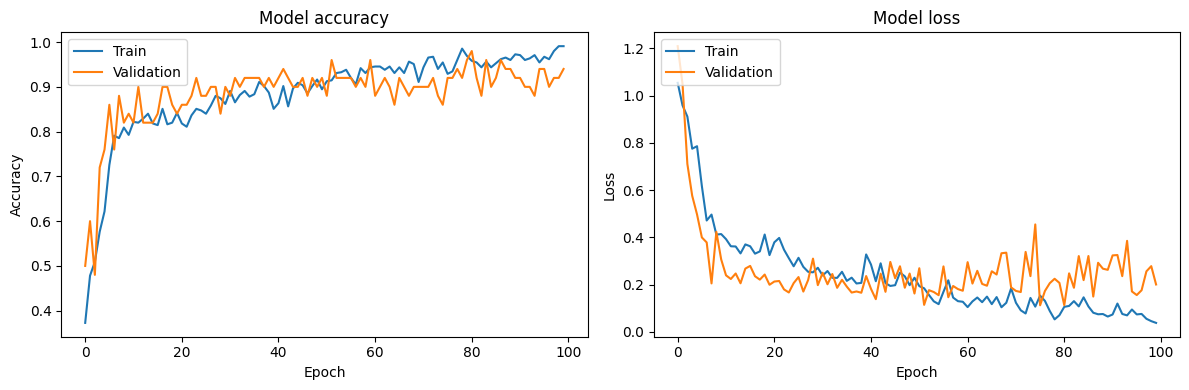

In [11]:
plt.figure(figsize=(12, 4))
dpi = 300

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

plt.savefig("Loss_Accuracy_curve_try2_1.pdf", dpi=dpi)
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 700ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.93      1.00      0.96        25
           2       0.88      0.92      0.90        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



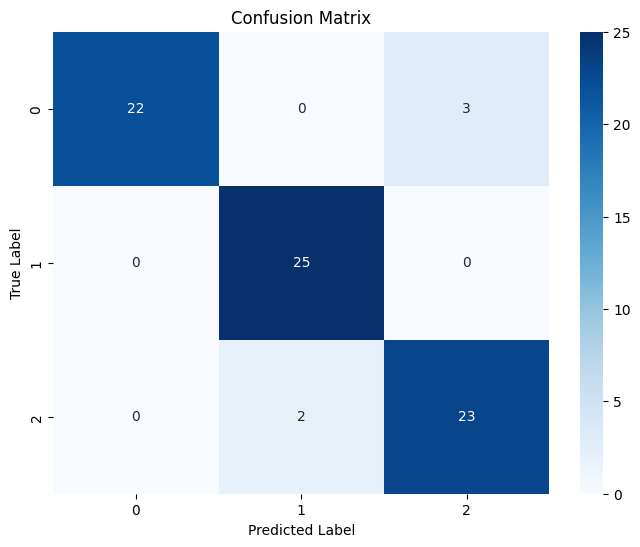

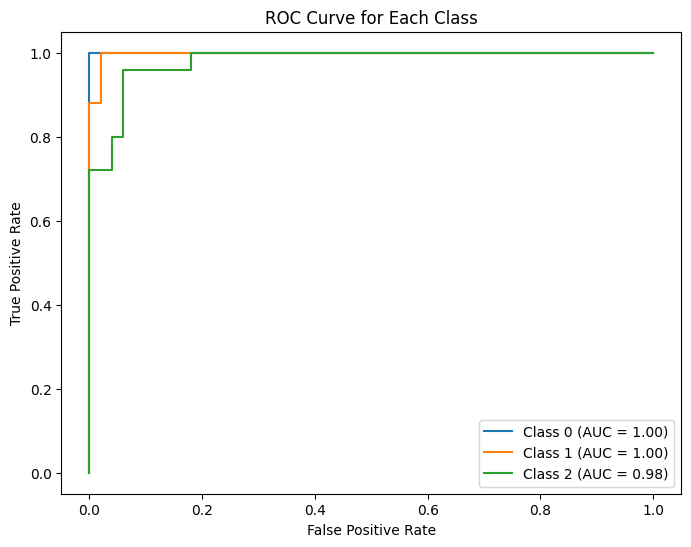

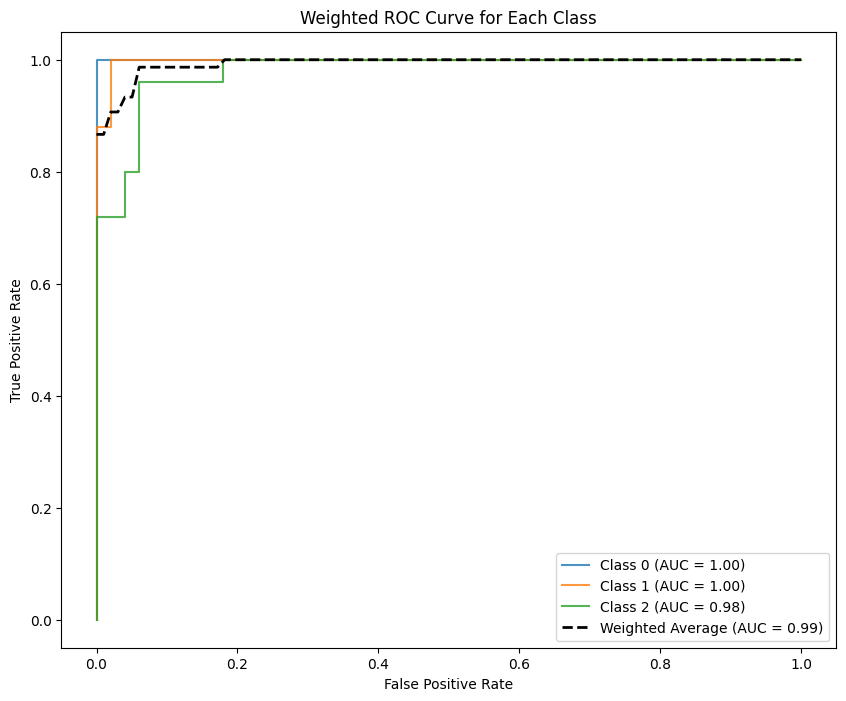

In [12]:
final_test_predictions = model.predict(final_test)

# Convert predictions to class labels
final_test_predictions_labels = np.argmax(final_test_predictions, axis=1)

# Convert true labels to class labels
final_true_labels = np.argmax(final_labels_reshaped, axis=1)

# Display classification report
classification_rep = classification_report(final_true_labels, final_test_predictions_labels)
print("Classification Report:")
print(classification_rep)


# Get unique class labels
class_labels = np.unique(final_true_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(final_true_labels, final_test_predictions_labels, labels=class_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Get unique class labels
class_labels = np.unique(final_true_labels)

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

# Get unique class labels
class_labels = np.unique(final_true_labels)

# Calculate ROC curve for each class
plt.figure(figsize=(10, 8))
all_fpr = []
mean_tpr = 0

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted ROC Curve for Each Class')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Classification Report:
              precision    recall  f1-score   support

     Neutral       1.00      0.88      0.94        25
    Positive       0.93      1.00      0.96        25
    Negative       0.88      0.92      0.90        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



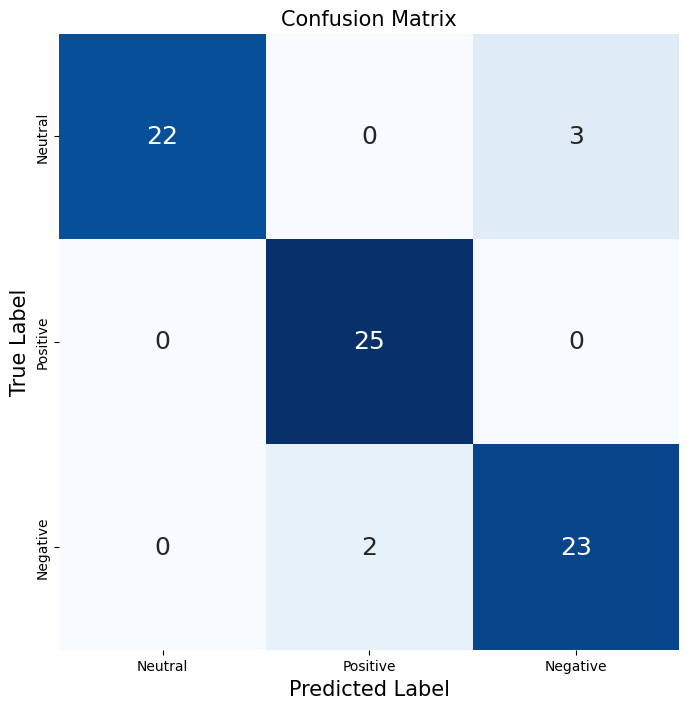

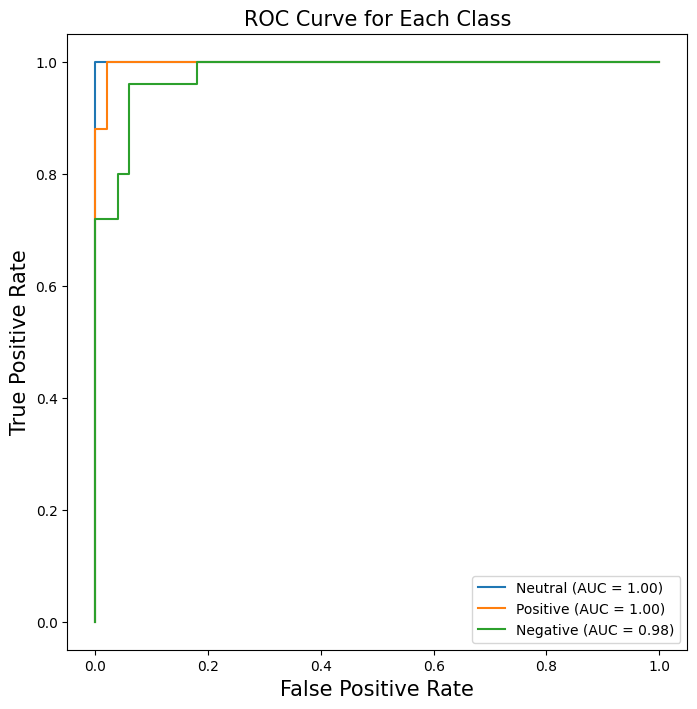

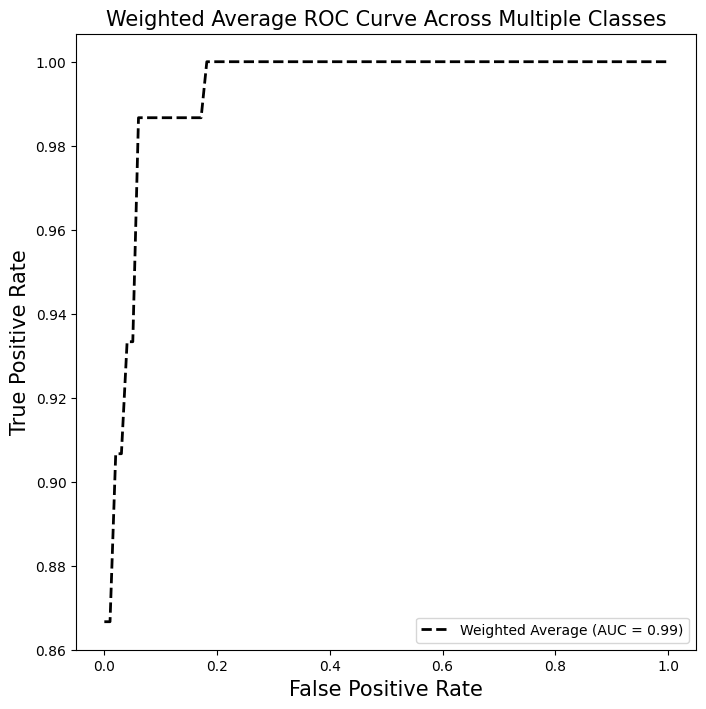

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming class label names are: Neutral, Positive, Negative
class_label_names = ['Neutral', 'Positive', 'Negative']

final_test_predictions = model.predict(final_test)

# Convert predictions to class labels
final_test_predictions_labels = np.argmax(final_test_predictions, axis=1)

# Convert true labels to class labels
final_true_labels = np.argmax(final_labels_reshaped, axis=1)

# Display classification report
classification_rep = classification_report(final_true_labels, final_test_predictions_labels, target_names=class_label_names)
print("Classification Report:")
print(classification_rep)

# Get unique class labels
class_labels = np.arange(len(class_label_names))

# Set the fixed value for image_number
image_number = 1.0

# Compute confusion matrix
conf_matrix = confusion_matrix(final_true_labels, final_test_predictions_labels, labels=class_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_label_names, yticklabels=class_label_names, cbar=False, annot_kws={"size": 18})
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.savefig(f"confusion_matrix_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"confusion_matrix_{image_number}.pdf")  # Save the plot as PDF
plt.show()

# Set the size for other plots
plot_size = (8, 8)

# Calculate ROC curve for each class
plt.figure(figsize=plot_size)
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Each Class', fontsize=15)
plt.legend()
plt.savefig(f"roc_curve_class_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"roc_curve_class_{image_number}.pdf")  # Save the plot as PDF
plt.show()

# Calculate ROC curve for each class and plot the weighted average ROC curve
plt.figure(figsize=plot_size)
all_fpr = []
mean_tpr = 0

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    #plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Weighted Average ROC Curve Across Multiple Classes', fontsize=15)
plt.legend()
plt.savefig(f"weighted_avg_roc_curve_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"weighted_avg_roc_curve_{image_number}.pdf")  # Save the plot as PDF
plt.show()
